In [3]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    result: str

In [ ]:
def first_node(state:AgentState) -> AgentState:
    """Personalize the Name Field with a Greeting"""
    state['result'] = f'{state['name']}, Welcome to the system!'
    return state


def second_node(state:AgentState) -> AgentState:
    """Describes the uSers Age"""
    state['result'] = state['result'] + f' You are {state['age']} years Old'
    return state


def third_node(state:AgentState) -> AgentState:
    """List the users skills in formatted String"""
    skill_set = ''
    for x in state['skills']:
        skill_set = skill_set + " " + x

    state['result'] = state['result'] + f' You have skills in: {skill_set}'
    return state


In [29]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)
graph.add_node('third_node', third_node)

graph.add_edge('first_node', 'second_node')
graph.add_edge('second_node','third_node')


graph.set_entry_point('first_node')
graph.set_finish_point('third_node')

app = graph.compile()

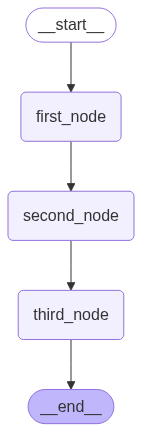

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
fin = app.invoke({'name': 'kax', 'age': '22', 'skills':['python', 'Machine learning', 'langgraph']})

fin['result']

"kax, Welcome to the system! You are 22 years Old You have skills in: ['python', 'Machine learning', 'langgraph']"